# Task: Import the pandas and numpy package

In [2]:
import pandas as pd
import numpy as np

# Task: Load the dataset into dataframe called df

In [3]:
df = pd.read_csv('../data/raw/day.csv')

# Task: Create a copy of df and save it into a variable called df_cleaned

In [4]:
df_cleaned = df.copy()

# Task: Import your new function convert_to_date from src.features.dates and convert the column dteday with your function

In [5]:
from src.features.dates import convert_to_date

df_cleaned = convert_to_date(df_cleaned, ['dteday'])

# Task: Create a new dataframe prophet_df that contains only the columns dteday and cnt from df_cleaned

In [6]:
prophet_df = df_cleaned[['dteday', 'cnt']]

# Task: Rename the columns of prophet_df to ds and y

In [7]:
prophet_df.columns = ['ds', 'y']

# Task: Save the dataframe in the `data/processed/` folder

In [8]:
prophet_df.to_csv('../data/processed/day_prophet.csv', index=False)

# 3 Train Prophet model with default hyperparameter

 # Task: Import the Prophet module from fbprophet

In [9]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# Task: Instantiate the Prophet class into a variable called prophet

In [10]:
prophet = Prophet()

# Task: Fit the model with the prepared data

In [11]:
prophet.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Task: Import dump from joblib and save the fitted model into the folder models as a file called prophet_default

In [12]:
from joblib import dump 

dump(prophet,  '../models/prophet_default.joblib')

['../models/prophet_default.joblib']

# Task: Create a new dataframe containing future dates for next 6 months using make_future_dataframe()

In [16]:
future = prophet.make_future_dataframe(freq='D', periods=30*6)

# Task: Forecast the future dates with predict() and save the results in a variable called forecast

In [17]:
forecast = prophet.predict(future)

# Task:  Plot the forecasts of this model with plot()

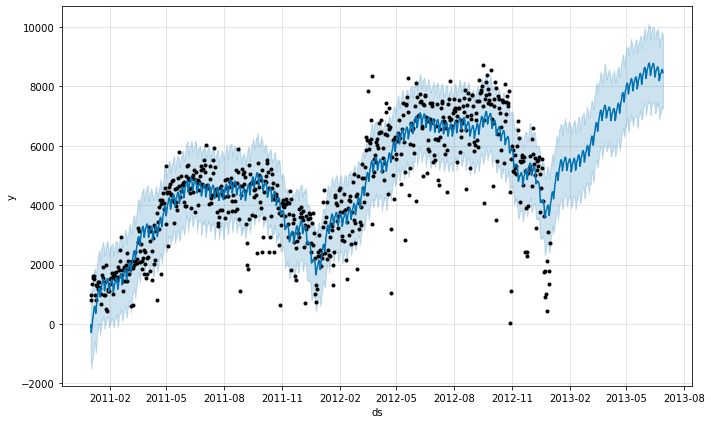

In [18]:
fig1 = prophet.plot(forecast)

# Task: Plot the components of this model with plot_components()

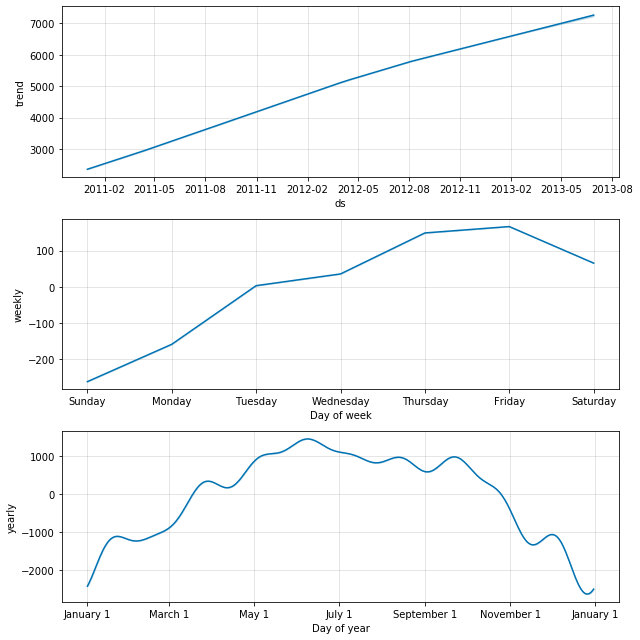

In [19]:
fig2 = prophet.plot_components(forecast)

# Task: Import cross_validation from fbprophet.diagnostics

In [20]:
from fbprophet.diagnostics import cross_validation

# Task: Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [21]:
cv_results = cross_validation(prophet, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


# Task: Import performance_metrics from fbprophet.diagnostics

In [22]:
from fbprophet.diagnostics import performance_metrics

# Task: Calculate performance metrics on the cross validation

In [23]:
metrics_results = performance_metrics(cv_results)

# Task: Import plot_cross_validation_metric from fbprophet.plot

In [24]:
from fbprophet.plot import plot_cross_validation_metric

# Task: Plot the RMSE score with plot_cross_validation_metric() on the cross validation results

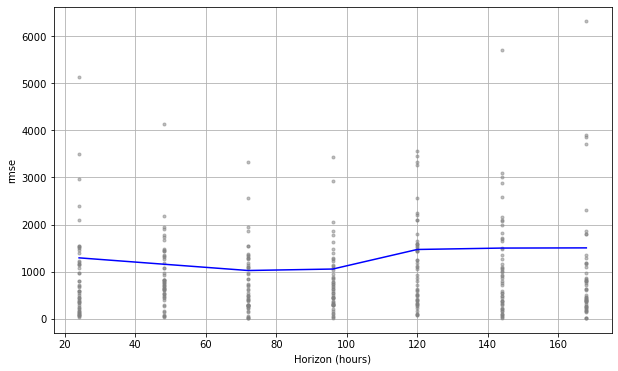

In [25]:
fig3 = plot_cross_validation_metric(cv_results, metric='rmse')

# 4: Train Prophet model with holidays

# Task: Instantiate the Prophet class into a variable called prophet1

In [26]:
prophet1 = Prophet()

# Task: Add the US holidays component to the model

In [28]:
prophet1.add_country_holidays(country_name='US')

# Task: Fit the model with the prepared data

In [30]:
prophet1.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Task: Save the fitted model into the folder models as a file called prophet_holiday.joblib

In [31]:
dump(prophet1,  '../models/prophet_holiday.joblib')

['../models/prophet_holiday.joblib']

# Task: Forecast the future dates with predict() and save the results in a variable called forecast1

In [32]:
forecast1 = prophet1.predict(future)

# Task: Print the components of this model on the predictions

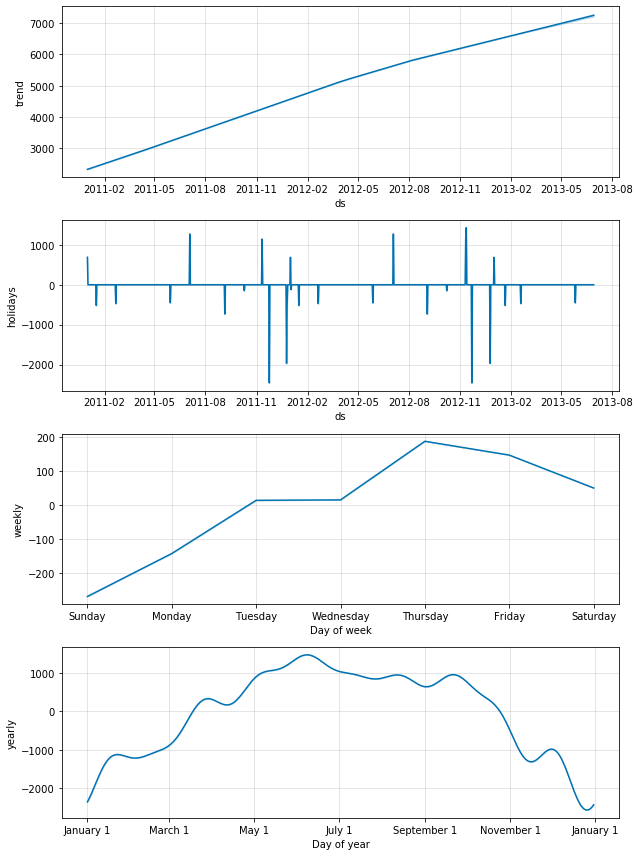

In [33]:
fig1 = prophet1.plot_components(forecast1)

# Task: Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [34]:
cv_results1 = cross_validation(prophet1, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


# Task: Plot the RMSE score with plot_cross_validation_metric() on the cross validation results

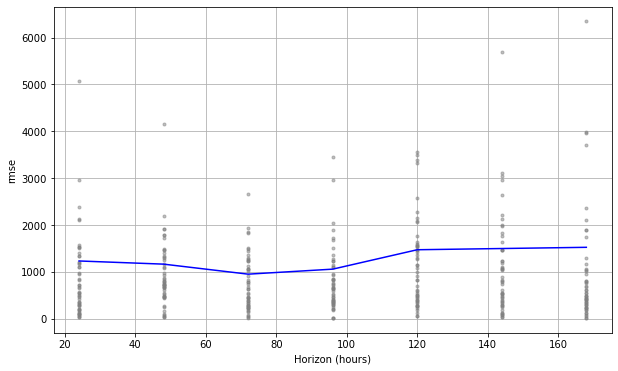

In [35]:
fig2 = plot_cross_validation_metric(cv_results1, metric='rmse')

# 5. Train Prophet model with monthly seasonality

# Task: Instantiate the Prophet class into a variable called prophet2 and add the US holidays component to the model

In [36]:
prophet2 = Prophet()
prophet2.add_country_holidays(country_name='US')

# Task: Add a monthly seasonal component to the model with period=30.5 and fourier_order=5

In [37]:
prophet2.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Task: Fit the model with the prepared data

In [38]:
prophet2.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Task: Save the fitted model into the folder models as a file called prophet_month.joblib

In [39]:
dump(prophet2,  '../models/prophet_month.joblib')

['../models/prophet_month.joblib']

# Task: Forecast the future dates with predict() and save the results in a variable called forecast2

In [40]:
forecast2 = prophet2.predict(future)

# Task: Print the components of this model on the predictions

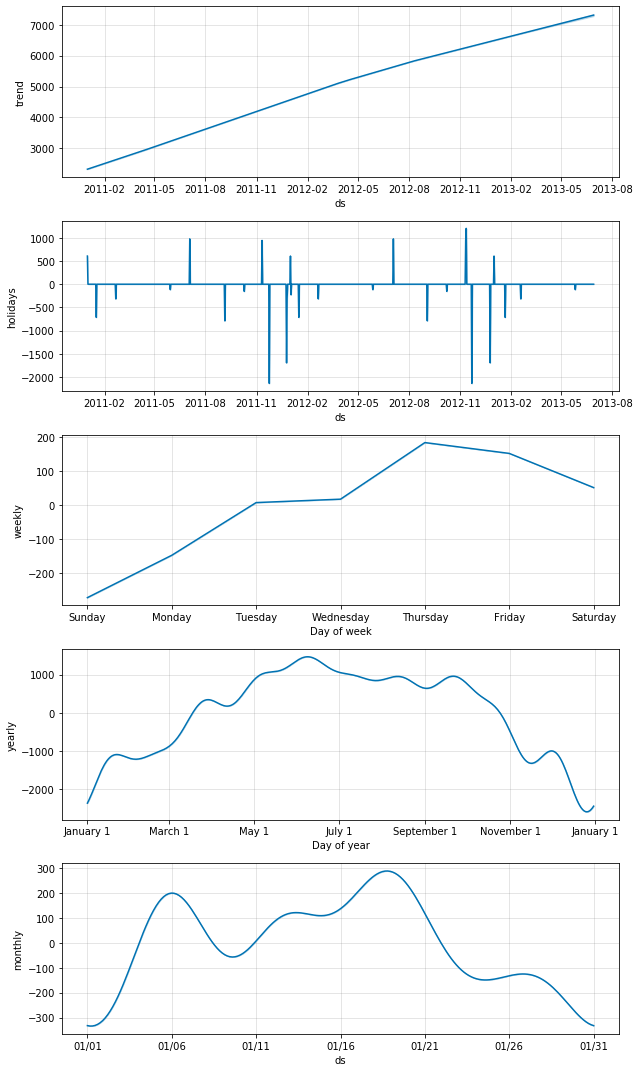

In [41]:
fig1 = prophet2.plot_components(forecast2)

# Task: Perform cross-validation with initial data of the first year (inital=365), forecast on future 7 days (horizon='7 days') and sliding window of 7 days (period='7 days')

In [42]:
cv_results2 = cross_validation(prophet2, initial='365 days', period='7 days', horizon='7 days')

INFO:fbprophet:Making 52 forecasts with cutoffs between 2012-01-02 00:00:00 and 2012-12-24 00:00:00


# Task: Plot the RMSE score with plot_cross_validation_metric() on the cross validation results

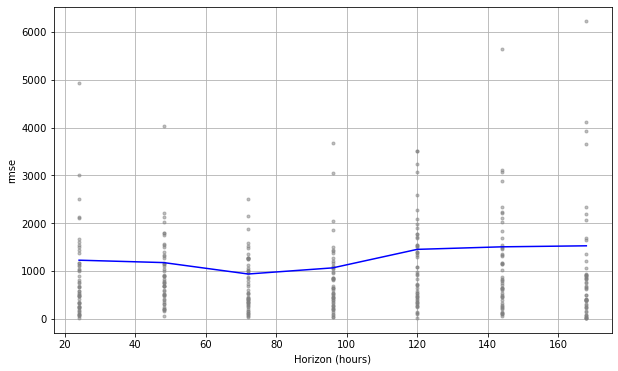

In [43]:
fig2 = plot_cross_validation_metric(cv_results2, metric='rmse')